After all, the fundamental reason we build predictive machine learning models is typically to model what would happen under a particular set of circumstances which have either not yet occurred or have occurred but for which we do not know the actual result.

	Hyperparameter tuning?
	Should I do BOTH data_with_paymentcols and data_without_paymentcols?
	Look at feature importances:
        barchart for top x features or all features with coefficient > y. 
        How can I find the p-value for features? Is that only in regression?
	Do Ridge Regression and Lasso Regression.
		Barchart for top features
	Make DataFrame with top features for my model, Lasso Regression, and Ridge Regression (or model and Ridge)
	Make inferences: 
		Does race show up in these features? Where?
		How do I interpret differences in RATES distinct from differences in CHARGES? A city doctor should CHARGE more, but should his rate b higher?
        Or should a rural (lowpop) doctor have higher rates bc he might charge less?
        Or might city doctors be cheap Public Health providers /Flu shots, thus paid in full?

    Look at extreme mistakes:
    Providers marked low but actually v high. Providers marked v high but actually low: barcharts of types of providers, racial majority, regions, subregions, histogram of submitted charges OR medicare payments, histogram of payment/service, histogram of payment/person. Boxplots of percent black / white / hispanic / asian for false very-highs and for false-lows



# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [4]:
X = pd.read_csv('../data/processed/feature_matrix_scaled_PT.csv', index_col=0)
X.head()

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,number_of_hcpcs,number_of_services,total_beneficiaries,total_submitted_charges,total_allowed_payment,avg_beneficiary_age,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,...,subregion_Pacific,subregion_South Atlantic,subregion_West North Central,subregion_West South Central,majority_asian,majority_black,majority_hispanic,majority_native_amer,majority_white,no_majority
0,-0.003948,0.540055,0.851671,1.196155,0.809928,0.998501,1.105662,0.871076,-0.119979,1.063762,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,0.585053,-0.416918
1,-0.170174,0.576787,1.015528,0.573919,0.880436,2.139463,0.994263,-0.276118,-0.317600,0.179416,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,0.585053,-0.416918
2,-1.402499,-1.478753,-2.032970,-2.079729,-2.198979,-1.181247,-1.398919,-1.041626,0.565058,-1.326987,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,4.440915,-0.234267,-0.033669,-1.709248,-0.416918
3,0.447350,1.158778,1.311877,1.152199,1.518093,1.833739,-0.416924,0.242840,0.442297,0.106138,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,-1.709248,2.398553
4,0.139490,-0.443103,-0.613947,-0.657554,-0.357803,-0.706375,1.649911,-0.268393,0.241994,-0.223406,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,-1.709248,2.398553


In [5]:
y = pd.read_csv('../data/processed/target_array.csv', index_col=0)
y.head()

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,payrate_level
0,low
1,high
2,medium
3,medium
4,high


In [6]:
X.shape, y.shape

((1072142, 191), (1072142, 1))

    The best performing models in my Preprocessing step were SVM (only when data was scaled) and Logistic Regression (a little better performance also when data was scaled).
    I'll be including both of these in this Modeling notebook to compare the important features.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values[:100000], y.values.ravel()[:100000], test_size = 0.2, random_state=2)

In [8]:
X_train.shape, y_train.shape

((80000, 191), (80000,))

In [9]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score


SVC

In [10]:
from sklearn.svm import SVC
#from sklearn.ensemble import BaggingClassifier
#n_estimators = 10
#svc = BaggingClassifier(SVC(kernel='linear'), max_samples = 1.0/n_estimators, n_estimators=n_estimators, n_jobs=-1, bootstrap=False)

start =  time.time()

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
end = time.time()

print('Time:', (end-start)/60, 'minutes')

Time: 11.375024648507436 minutes


In [11]:
start =  time.time()

ypred_svc = svc.predict(X_test)

end = time.time()
print('Time:', (end-start)/60, 'minutes')

Time: 1.0247686386108399 minutes


In [12]:
f1_svc = f1_score(y_test, ypred_svc, average='weighted')
recall_svc = recall_score(y_test, ypred_svc, average='weighted')
precision_svc = precision_score(y_test, ypred_svc, average='weighted')

Time: 1.0160921136538188 minutes


<Figure size 1440x1440 with 0 Axes>

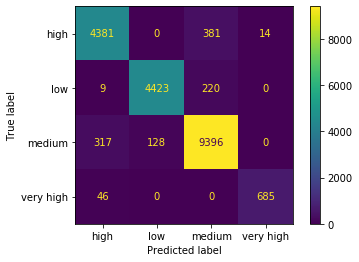

In [13]:
from sklearn.metrics import plot_confusion_matrix

start = time.time()

plt.figure(figsize=(20,20))

plot_confusion_matrix(svc, X_test, y_test)

end=time.time()
print('Time:', (end-start)/60, 'minutes')

Logistic Regression, using solver='sag' to improve speed

In [19]:
from sklearn.linear_model import LogisticRegression

start =  time.time()

lr = LogisticRegression(n_jobs=-1)

lr.fit(X_train, y_train)
end = time.time()

print('Time:', (end-start)/60, 'minutes')

Time: 0.3455272833506266 minutes


In [20]:
start =  time.time()

ypred_lr = lr.predict(X_test)

end = time.time()
print('Time:', (end-start)/60, 'minutes')

Time: 0.000811314582824707 minutes


In [21]:
f1_lr = f1_score(y_test, ypred_lr, average='weighted')
recall_lr = recall_score(y_test, ypred_lr, average='weighted')
precision_lr = precision_score(y_test, ypred_lr, average='weighted')
print(f1_lr, recall_lr, precision_lr)

0.9336442100605981 0.93375 0.9339985518636946


Time: 0.002735030651092529 minutes


<Figure size 1440x1440 with 0 Axes>

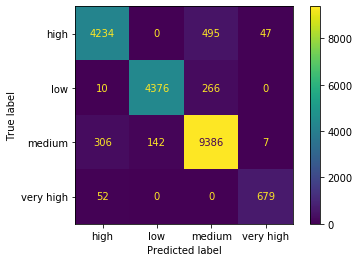

In [22]:
from sklearn.metrics import plot_confusion_matrix

start = time.time()

plt.figure(figsize=(20,20))

plot_confusion_matrix(lr, X_test, y_test)

end=time.time()
print('Time:', (end-start)/60, 'minutes')

In [23]:
scores = pd.DataFrame({'models':['SVC', 'Logistic Regression'],
             'F1 Scores': [f1_svc, f1_lr],
             'Recall Scores': [recall_svc, recall_lr],
             'Precision Scores':[precision_svc, precision_lr]})
scores

,models,F1 Scores,Recall Scores,Precision Scores
0,SVC,0.944278,0.94425,0.944455
1,Logistic Regression,0.933644,0.93375,0.933999


In [34]:
X_train.shape

(80000, 191)

In [33]:
svc.coef_.shape

(6, 191)

In [32]:
lr.coef_.shape

(4, 191)

In [ ]:
lr.

In [31]:
#descending_idx_svc = svc.coef_.argsort()[::-1]
#descending_idx_lr = lr.coef_.argsort()[::-1]

pd.DataFrame({'features': X.columns, 
            # 'svc coefficients': abs(svc.coef_),
             'lr coefficents': abs(lr.coef_),
           #  'svc is positive?': svc.coef_ > 1,
             'lr is positive?': lr.coef_ > 1})

Exception: Data must be 1-dimensional

Without any hyperparameter tuning my best model was the Logistic Regression with 90%. In another preprocessing notebook, the Logistic Regression model also performed best with addition Medicare-Payment columns (which I left out here because of possible collinearity) at 99%. 

Because the ratio of Medicare payment to Submitted charges actually tells whether the client is low rate, medium rate or high rate, I prefer to leave these out. I'm not sure if the models can "figure out" that relationship or not. 

My goal is actually to have a pretty good model that has a few mistakes because these mistakes are just as telling as the ability of the model to correctly identify classes. 

On that note, I am interested in the F1 Score particularly for the "very high" class and "low" class because I want to know whether the model falsely labels high-rate providers as low or vice versa. That said, maybe I don't want to optimize for "low" class F1 Score but rather the OVERALL F1 score. If a model is generally very accurate but still mislabels some outliers, those outliers may be worth re-examining. 

Overall, my modeling notebook will focus most heavily of feature importances and tables that contain the extreme outliers: low rate providers labeled as 'very high' and very high rate providers labeled as very low. I want to see if these providers show a pattern. 

If they do seem fishy, a final iteration of modeling may be one that labels these outliers as "wrongly compensated" and trains on the data to look for other potential "wrongly compensated" providers. 

I didn't scale my date before modeling here, both because I may want to say that for the "modeling" stage since my initial performances were good and because the combination of binary and continuous variables may complicate that process. 